In [ ]:
import pandas as pd
import datetime
import pandas_datareader.data as web
import datetime as dt
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt


In [2]:
#تحميل البيانات السعريه من موقع الياهو 
start = datetime.datetime(2015, 1, 1)  
end = datetime.datetime(2020, 12, 11)   
BTC = web.get_data_yahoo('BTC-USD',start,end) # لسحب البيانات السعريه لبيتكوين

In [ ]:
!pip install fbprophet   # تسطيب مكتبة خوارزمية الفيس بوك على اناكوندا
from fbprophet import Prophet  # تحميل خوارزمية الفيس بوك لأجل الأستخدام

In [12]:
BTC.reset_index(inplace=True)
model =Prophet() # تهية خوازمية الفيس بوك
BTC[['ds', 'y']] = BTC[['Date', 'Adj Close']]   # اضافة كلا من ds و y  

In [14]:
BTC.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,ds,y
2167,2020-12-07,19411.828125,18931.142578,19343.128906,19191.630859,2.689636e+10,19191.630859,2020-12-07,19191.630859
2168,2020-12-08,19283.478516,18269.945312,19191.529297,18321.144531,3.169229e+10,18321.144531,2020-12-08,18321.144531
2169,2020-12-09,18626.292969,17935.546875,18320.884766,18553.916016,3.442037e+10,18553.916016,2020-12-09,18553.916016
2170,2020-12-10,18553.298828,17957.064453,18553.298828,18264.992188,2.554713e+10,18264.992188,2020-12-10,18264.992188
2171,2020-12-12,18284.265625,18088.003906,18235.845703,18277.728516,2.838410e+10,18277.728516,2020-12-12,18277.728516


In [15]:
model.fit(BTC)  # إضافة جدول البيانات الى خوازمية الفيس بوك لأجل التحليل

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [19]:
future = model.make_future_dataframe(periods = 365)   #يقوم بإضافة عدد الأيام او شهور الى خوارزميه وتم اضافه عدد ايام 365 اي سنة 

In [20]:
forecast = model.predict(future)  # بدأ بالتنفيذ لتحليل البيانات لمده سنه التاليه

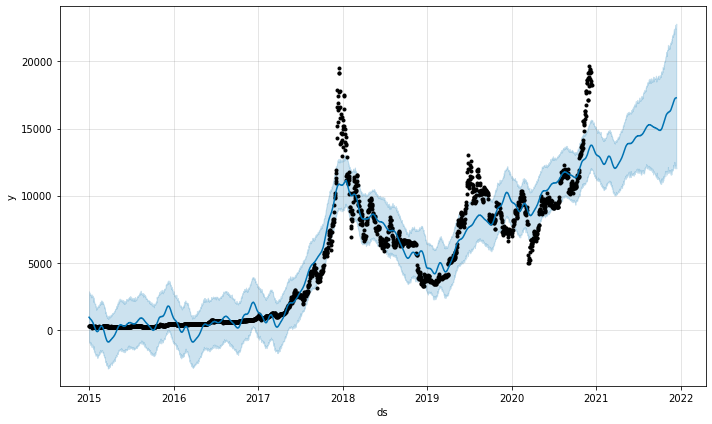

In [25]:
model.plot(forecast)  # عمل رسم البياني للبيانات المعطاه
plt.show()